# Gaussian on a Grid Test with compositional score matching

In this notebook, we will test the compositional score matching on a hierarchical problem defined on a grid.
- The observations are on grid with `n_grid` x `n_grid` points.
- The global parameters are the same for all grid points with hyper-priors:
$$ \mu \sim \mathcal{N}(0, 3^2),\qquad \log\sigma \sim \mathcal{N}(0, 1^2)$$

- The local parameters are different for each grid point
$$ \theta_{i,j} \sim \mathcal{N}(\mu, \sigma^2)$$

-  In each grid point, we have a Brownian motion with drift:
$$ dx_t = \theta \cdot dt + \sqrt{dt} \cdot dW_t$$
- We observe $T=10$ time points for each grid point over a time horizon of `max_time=1`.

In [1]:
import os

import numpy as np

os.environ['KERAS_BACKEND'] = 'torch'
from bayesflow import diagnostics

from problems.gaussian_grid import Prior, Simulator, visualize_simulation_output, plot_shrinkage, get_stan_posterior

/Users/jonas.arruda/miniconda/envs/hierarchical-score-matching/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
14:17:24 - cmdstanpy - INFO - compiling stan file /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmp275nxy87/tmp7eoxfhsr.stan to exe file /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid
INFO:cmdstanpy:compiling stan file /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmp275nxy87/tmp7eoxfhsr.stan to exe file /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=gaussian_grid.stan /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmp275nxy87/tmp7eoxfhsr
cwd: /Users/jonas.arruda/.cmdstan/cmdstan-2.36.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc -

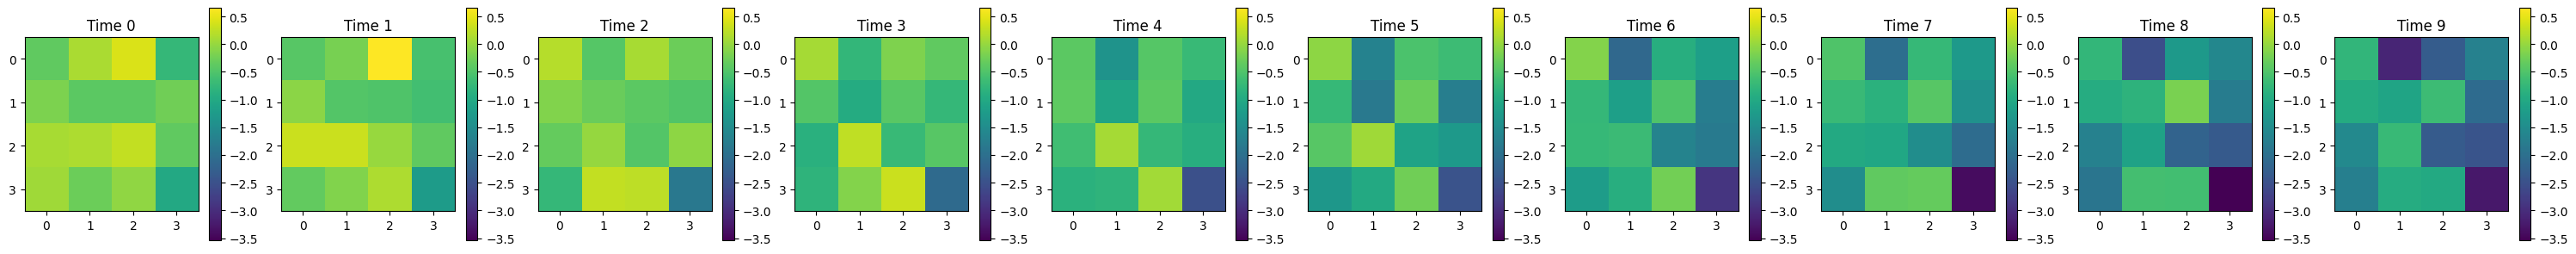

(0.1, 1)

In [5]:
n_grid = 4
T = 10
N = n_grid * n_grid  # number of samples
data_samples = 100

prior = Prior(n_time_points=T)
simulator = Simulator(n_time_points=T, max_time=1, sigma_noise=1)

global_param_names = [r'$\mu$', r'$\log \sigma$']
local_param_names = [r'$\theta_{' + str(i) + '}$' for i in range(n_grid * n_grid)]

# test the simulator
sim_test = simulator(prior.sample_full(1, n_grid=n_grid))['observable']
if T <= 10:
    visualize_simulation_output(sim_test)

simulator.dt, simulator.sigma_noise

In [6]:
np.random.seed(42)

global_posteriors = []
local_posteriors = []

true_global = []
true_local = []

for i in range(data_samples):
    print(i)
    param_sample = prior.sample_full(1, n_grid=n_grid)
    true_global.append([param_sample['mu'][0, 0], param_sample['log_sigma'][0, 0]])
    true_local.append(param_sample['theta'].flatten())
    sim_test = simulator(param_sample)['increments'][0]

    global_posterior, local_posterior = get_stan_posterior(sim_test, dt_obs=simulator.dt, sigma_noise=simulator.sigma_noise)
    global_posteriors.append(global_posterior)
    local_posteriors.append(local_posterior)

# make numpy arrays
global_posterior = np.stack(global_posteriors, axis=0)
local_posterior = np.stack(local_posteriors, axis=0).transpose(0, 2, 1)

true_global = np.stack(true_global, axis=0)
true_local = np.stack(true_local, axis=0)

DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/bok9x7z7.json
14:18:00 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=53986', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/bok9x7z7.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_38x9zq9/gaussian_grid-20250318141800_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:ru

0


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/x3o3t82d.json
14:18:00 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=40211', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/x3o3t82d.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridl2uqtdjy/gaussian_grid-20250318141800_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:00 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:running 

1


14:18:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:00 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:00 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:00 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=40211', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/x3o3t82d.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridl2uqtdjy/gaussian_grid-20250318141800_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

2


14:18:01 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:01 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=86576', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/y36s7ou3.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridukzvszjx/gaussian_grid-20250318141800_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridukzvszjx/gaussian_grid-20250318141800_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridukzvszjx/gau

3


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/d0urulox.json
14:18:01 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=78898', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/d0urulox.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridg4xojvby/gaussian_grid-20250318141801_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:01 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:ru

4


14:18:01 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=78898', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/d0urulox.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridg4xojvby/gaussian_grid-20250318141801_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridg4xojvby/gaussian_grid-20250318141801_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridg4xojvby/gaussian_grid-20250318141801_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

5


14:18:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:01 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:01 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:01 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=54122', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/3qyph28v.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid33j0dvb8/gaussian_grid-20250318141801_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

6


14:18:02 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=35775', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/bxfw0o12.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid02d8m_uw/gaussian_grid-20250318141802_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid02d8m_uw/gaussian_grid-20250318141802_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid02d8m_uw/gaussian_grid-20250318141802_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

7


14:18:02 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:02 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:02 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=24173', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/jppniale.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridvz2i9kj8/gaussian_grid-20250318141802_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

8


14:18:02 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:02 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=96404', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/17x528_1.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridjb5sx_dm/gaussian_grid-20250318141802_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridjb5sx_dm/gaussian_grid-20250318141802_1.csv
 console_msgs 

9


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/j5011zcj.json
14:18:03 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=95675', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/j5011zcj.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid9t_7u5ew/gaussian_grid-20250318141803_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:Cm

10


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/4f3yxtho.json
14:18:03 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=3693', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/4f3yxtho.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gride537rqxz/gaussian_grid-20250318141803_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:03 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:run

11


14:18:03 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:03 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:03 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=3693', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/4f3yxtho.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gride537rqxz/gaussian_grid-20250318141803_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gride537rqxz/gaussian_grid-20250318141803_1.csv
 console_msgs (

12


14:18:03 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:03 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:03 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=75194', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/01q70m7w.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2ij7vosc/gaussian_grid-20250318141803_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2ij7vosc/gaussian_grid-20250318141803_1.csv
 console_msgs 

13


14:18:04 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=89112', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/doslzlk1.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridlrnvoyj6/gaussian_grid-20250318141803_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridlrnvoyj6/gaussian_grid-20250318141803_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridlrnvoyj6/gaussian_grid-20250318141803_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

14


14:18:04 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:04 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:04 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=45326', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/qgc7w2b_.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_griddts4unl3/gaussian_grid-20250318141804_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

15


14:18:04 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:04 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:04 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=74808', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/agb81lmg.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2cbwdlew/gaussian_grid-20250318141804_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

16


14:18:04 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:04 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:04 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=74845', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gbg_6ncq.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridnk9sg4np/gaussian_grid-20250318141804_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

17


14:18:05 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:05 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=36366', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/xsbp_uwh.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridifl2gmiz/gaussian_grid-20250318141804_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridifl2gmiz/gaussian_grid-20250318141804_1.csv
 console_msgs 

18


14:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:05 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:05 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=69486', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/uv0fs927.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid0zaxsa6y/gaussian_grid-20250318141805_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid0zaxsa6y/gaussian_grid-20250318141805_1.csv
 console_msgs 

19


14:18:05 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:05 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:05 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=6302', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/yr1u9qp7.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridh86s96ey/gaussian_grid-20250318141805_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb

20


14:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:05 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=53235', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/uexau95m.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridg14oq47d/gaussian_grid-20250318141805_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridg14oq47d/gaussian_grid-20250318141805_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridg14oq47d/gau

21


14:18:06 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=56858', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/0372a8cm.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid53mxvbnl/gaussian_grid-20250318141805_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid53mxvbnl/gaussian_grid-20250318141805_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid53mxvbnl/gaussian_grid-20250318141805_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

22


14:18:06 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:06 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:06 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=33218', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/wviw4z08.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridetsk9e18/gaussian_grid-20250318141806_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

23


14:18:06 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:06 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:06 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=41298', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/1p12it5_.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridrhk0p478/gaussian_grid-20250318141806_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

24


14:18:07 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=8829', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/0gjq0v04.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid09ebic61/gaussian_grid-20250318141806_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid09ebic61/gaussian_grid-20250318141806_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid09ebic61/gaus

25


14:18:07 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:07 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:07 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=18877', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/b4ijbyv9.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridvyuq53yh/gaussian_grid-20250318141807_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridvyuq53yh/gaussian_grid-20250318141807_1.csv
 console_msgs 

26


INFO:cmdstanpy:Chain [1] done processing
14:18:07 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:07 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=87875', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/c7blx1lr.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid8lw4cc9m/gaussian_grid-20250318141807_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid8lw4cc9m/gaussian_grid-20250318141807_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000g

27


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/mbkg7v6o.json
14:18:07 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=22944', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/mbkg7v6o.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grided8nz1aa/gaussian_grid-20250318141807_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:07 - cmdstanpy - INFO

28


14:18:08 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:08 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=22944', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/mbkg7v6o.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grided8nz1aa/gaussian_grid-20250318141807_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grided8nz1aa/gaussian_grid-20250318141807_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grided8nz1aa/gau

29


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/viab6hvo.json
14:18:08 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=45232', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/viab6hvo.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridgq1cqbwy/gaussian_grid-20250318141808_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:ru

30


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/80mksbz9.json
14:18:08 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=1766', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/80mksbz9.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridftq971rq/gaussian_grid-20250318141808_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:08 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:run

31


14:18:08 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=1766', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/80mksbz9.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridftq971rq/gaussian_grid-20250318141808_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridftq971rq/gaussian_grid-20250318141808_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridftq971rq/gaussian_grid-20250318141808_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)


32


14:18:09 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:09 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:09 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=39014', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/v4dcvnb4.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_ib5m0ze/gaussian_grid-20250318141808_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_ib5m0ze/gaussian_grid-20250318141808_1.csv
 console_msgs 

33


14:18:09 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=33948', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/w_ia2ruv.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridd7oa9_3d/gaussian_grid-20250318141809_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridd7oa9_3d/gaussian_grid-20250318141809_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridd7oa9_3d/gaussian_grid-20250318141809_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

34


14:18:09 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=89797', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/1wab_w6n.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridiw_6oysn/gaussian_grid-20250318141809_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridiw_6oysn/gaussian_grid-20250318141809_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridiw_6oysn/gaussian_grid-20250318141809_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

35


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/6fjfbtbg.json
14:18:09 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=30658', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/6fjfbtbg.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2pwsd8pe/gaussian_grid-20250318141809_1.csv', 'method=sample', 'algorithm=hmc', '

36


14:18:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:09 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:10 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=30658', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/6fjfbtbg.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2pwsd8pe/gaussian_grid-20250318141809_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2pwsd8pe/gaussian_grid-20250318141809_1.csv
 console_msgs 

37


14:18:10 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=86738', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/zu3zq92l.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridcfejsim2/gaussian_grid-20250318141810_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridcfejsim2/gaussian_grid-20250318141810_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridcfejsim2/gaussian_grid-20250318141810_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

38


14:18:10 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:10 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:10 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=82779', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/jmtgxjpe.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridjsq4aoqg/gaussian_grid-20250318141810_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

39


14:18:10 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:10 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:10 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=66582', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/2iespxw9.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid50hphfv5/gaussian_grid-20250318141810_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

40


14:18:11 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:11 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=23229', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/0_8sjmp5.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridd0_dgsey/gaussian_grid-20250318141810_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridd0_dgsey/gaussian_grid-20250318141810_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridd0_dgsey/gau

41


14:18:11 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:11 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=62858', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/hbr3k_s8.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grida56b1ifv/gaussian_grid-20250318141811_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

42


14:18:11 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:11 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=5607', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/34a5pfv7.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid843e77ac/gaussian_grid-20250318141811_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid843e77ac/gaussian_grid-20250318141811_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid843e77ac/gaus

43


14:18:11 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:11 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=55311', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/be68yca1.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridfjypx0wx/gaussian_grid-20250318141811_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridfjypx0wx/gaussian_grid-20250318141811_1.csv
 console_msgs 

44


14:18:12 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:12 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:12 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=88678', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/4lm8nnok.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridd81onbz8/gaussian_grid-20250318141811_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

45


14:18:12 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:12 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:12 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=81703', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/1z73ssri.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridov2505tm/gaussian_grid-20250318141812_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

46


14:18:12 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:12 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=39486', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/_qebq74k.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_3vltk04/gaussian_grid-20250318141812_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_3vltk04/gaussian_grid-20250318141812_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_3vltk04/gau

47


14:18:12 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=86389', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/hli1er9o.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_kdta22_/gaussian_grid-20250318141812_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_kdta22_/gaussian_grid-20250318141812_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_kdta22_/gaussian_grid-20250318141812_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

48


14:18:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:13 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:13 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:13 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=81606', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/vw92_hlb.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gride1_1_zea/gaussian_grid-20250318141813_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

49


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/9b9giv2l.json
14:18:13 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=60357', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/9b9giv2l.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridga3u_6ir/gaussian_grid-20250318141813_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:13 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:ru

50


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/vccfx2hf.json
14:18:13 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=69563', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/vccfx2hf.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridbfa__f84/gaussian_grid-20250318141813_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:13 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:ru

51


14:18:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:13 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:13 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:13 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=69563', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/vccfx2hf.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridbfa__f84/gaussian_grid-20250318141813_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

52


14:18:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:14 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=22791', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/nlkvukgg.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid0sjb5cew/gaussian_grid-20250318141814_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid0sjb5cew/gaussian_grid-20250318141814_1.csv
 console_msgs 

53


14:18:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=40209', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/2w6z4bgd.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridx7u2r2w_/gaussian_grid-20250318141814_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridx7u2r2w_/gaussian_grid-20250318141814_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridx7u2r2w_/gaussian_grid-20250318141814_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

54


14:18:14 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:14 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=48664', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/mk8j9a17.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridqgz13d62/gaussian_grid-20250318141814_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridqgz13d62/gaussian_grid-20250318141814_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridqgz13d62/gau

55


14:18:15 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:15 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=32180', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/daf9vfyr.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridesdo1_nc/gaussian_grid-20250318141814_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridesdo1_nc/gaussian_grid-20250318141814_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridesdo1_nc/gau

56


14:18:15 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:15 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:15 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=76212', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/vf7sj4wj.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridivkqo136/gaussian_grid-20250318141815_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

57


14:18:15 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=23729', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/5bcjqxcg.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid5foo19z7/gaussian_grid-20250318141815_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid5foo19z7/gaussian_grid-20250318141815_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid5foo19z7/gaussian_grid-20250318141815_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

58


14:18:15 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=61530', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/v__in6pg.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_griduhkifh4r/gaussian_grid-20250318141815_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_griduhkifh4r/gaussian_grid-20250318141815_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_griduhkifh4r/gaussian_grid-20250318141815_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

59


14:18:16 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:16 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=64785', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/ah_j_jkt.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid6z0px79n/gaussian_grid-20250318141815_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid6z0px79n/gaussian_grid-20250318141815_1.csv
 console_msgs 

60


14:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:16 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:16 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=25243', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/erhywpdd.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid0vc1mi6b/gaussian_grid-20250318141816_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

61


14:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=33268', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/il3zxr4u.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid559pr8uw/gaussian_grid-20250318141816_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid559pr8uw/gaussian_grid-20250318141816_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid559pr8uw/gau

62


14:18:16 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=65598', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/tns_hwne.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridlr6w4ey5/gaussian_grid-20250318141816_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridlr6w4ey5/gaussian_grid-20250318141816_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridlr6w4ey5/gaussian_grid-20250318141816_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

63


14:18:17 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:17 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=62550', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/rqd_2b6f.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridyt92_jlu/gaussian_grid-20250318141817_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

64


14:18:17 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=98741', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gjeapzrw.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridtjdshf52/gaussian_grid-20250318141817_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridtjdshf52/gaussian_grid-20250318141817_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridtjdshf52/gaussian_grid-20250318141817_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

65


14:18:17 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:17 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=67984', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/xk9umj_6.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2c4cuog2/gaussian_grid-20250318141817_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

66


14:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:18 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=19924', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/06fckqvn.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_yfv_njb/gaussian_grid-20250318141817_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_yfv_njb/gaussian_grid-20250318141817_1.csv
 console_msgs 

67


14:18:18 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:18 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:18 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=77116', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/i5fz__ld.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridib38k4p0/gaussian_grid-20250318141818_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridib38k4p0/gaussian_grid-20250318141818_1.csv
 console_msgs 

68


14:18:18 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:18 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:18 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=58222', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/tp0rq_4s.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridie4c2366/gaussian_grid-20250318141818_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

69


14:18:18 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:18 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=49746', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/b509vb29.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridink1yf1u/gaussian_grid-20250318141818_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridink1yf1u/gaussian_grid-20250318141818_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridink1yf1u/gau

70


14:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:19 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:19 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:19 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=79630', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/eyy9f7g9.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridk2_58cv5/gaussian_grid-20250318141818_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

71


14:18:19 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=79360', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/mgclf1br.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridg1wnnbvm/gaussian_grid-20250318141819_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridg1wnnbvm/gaussian_grid-20250318141819_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridg1wnnbvm/gaussian_grid-20250318141819_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

72


INFO:cmdstanpy:Chain [2] done processing
14:18:19 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:19 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=57419', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/ah573kau.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridqk44was3/gaussian_grid-20250318141819_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridqk44was3/gaussian_grid-20250318141819_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000g

73


14:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:19 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=27124', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/__qp3rda.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridaiqdnfsl/gaussian_grid-20250318141819_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridaiqdnfsl/gaussian_grid-20250318141819_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridaiqdnfsl/gau

74


14:18:20 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:20 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:20 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=34787', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/lca_epgm.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridgtta3zw4/gaussian_grid-20250318141819_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

75


14:18:20 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:20 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=92711', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/8e_mra3i.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridwpxrznfo/gaussian_grid-20250318141820_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridwpxrznfo/gaussian_grid-20250318141820_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridwpxrznfo/gau

76


14:18:20 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:20 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:20 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=7489', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/rvp85o5j.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid47ldpzpd/gaussian_grid-20250318141820_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb

77


14:18:20 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:20 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=56881', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/_4ks6y_k.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridm_ru_l36/gaussian_grid-20250318141820_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridm_ru_l36/gaussian_grid-20250318141820_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridm_ru_l36/gau

78


14:18:21 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:21 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=47385', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/jf3fokll.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid3i7_414y/gaussian_grid-20250318141820_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid3i7_414y/gaussian_grid-20250318141820_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid3i7_414y/gau

79


14:18:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:21 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=16149', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/tg43cfpp.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridw93z6c87/gaussian_grid-20250318141821_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridw93z6c87/gaussian_grid-20250318141821_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridw93z6c87/gau

80


14:18:21 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=64386', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/g9bkbw5j.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridv7e8z20w/gaussian_grid-20250318141821_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridv7e8z20w/gaussian_grid-20250318141821_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridv7e8z20w/gaussian_grid-20250318141821_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

81


14:18:21 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:21 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:21 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=41924', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/86yu67og.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridshrjm_o5/gaussian_grid-20250318141821_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

82


14:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:22 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:22 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:22 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=77040', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/c5c38snn.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_griddif1argf/gaussian_grid-20250318141822_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

83


14:18:22 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:22 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:22 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=40705', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/lsiu8oel.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridyyvz0wb8/gaussian_grid-20250318141822_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridyyvz0wb8/gaussian_grid-20250318141822_1.csv
 console_msgs 

84


INFO:cmdstanpy:Chain [3] done processing
14:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:22 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=39804', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/6qeu_0r3.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_griddcc87ezb/gaussian_grid-20250318141822_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_griddcc87ezb/gaussian_grid-20250318141822_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000g

85


14:18:23 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:23 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=59164', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/5gt_y4nm.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridk3bbg2y2/gaussian_grid-20250318141822_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

86


14:18:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:23 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:23 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=79788', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/1cxx4e2t.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid_5_16chu/gaussian_grid-20250318141823_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

87


14:18:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:23 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:23 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:23 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=14048', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/fm_rag9l.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridosdz3wj9/gaussian_grid-20250318141823_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

88


14:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:24 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:24 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:24 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=65203', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/wr39p7fn.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridtkei3vrt/gaussian_grid-20250318141823_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

89


14:18:25 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:25 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:25 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=48920', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/a77_37gt.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid8f_mq56c/gaussian_grid-20250318141824_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

90


14:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:25 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:25 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:25 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=62654', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/iuplttj8.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridoua21yye/gaussian_grid-20250318141825_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

91


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/4vl0hbxq.json
14:18:26 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=47413', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/4vl0hbxq.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid6s8tewsv/gaussian_grid-20250318141826_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:ru

92


14:18:26 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=47413', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/4vl0hbxq.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid6s8tewsv/gaussian_grid-20250318141826_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid6s8tewsv/gaussian_grid-20250318141826_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid6s8tewsv/gaussian_grid-20250318141826_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

93


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/krxnlrga.json
14:18:26 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=41019', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/krxnlrga.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid74z_p4eb/gaussian_grid-20250318141826_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:26 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
INFO:cmdstanpy:Cha

94


14:18:26 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
14:18:26 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=41019', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/krxnlrga.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid74z_p4eb/gaussian_grid-20250318141826_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid74z_p4eb/gaussian_grid-20250318141826_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid74z_p4eb/gau

95


DEBUG:cmdstanpy:cmd: /Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid info
cwd: None
DEBUG:cmdstanpy:input tempfile: /var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/0kotlvoo.json
14:18:27 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:CmdStan args: ['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=68866', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/0kotlvoo.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2r9gr5u2/gaussian_grid-20250318141827_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
14:18:27 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
INFO:cmdstanpy:Cha

96


14:18:27 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=68866', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/0kotlvoo.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2r9gr5u2/gaussian_grid-20250318141827_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2r9gr5u2/gaussian_grid-20250318141827_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid2r9gr5u2/gau

97


14:18:27 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:27 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:27 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=29224', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/5s5e4chs.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid40ckodmu/gaussian_grid-20250318141827_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid40ckodmu/gaussian_grid-20250318141827_1.csv
 console_msgs 

98


14:18:27 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=31650', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/63akz_qq.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid805vv4nn/gaussian_grid-20250318141827_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid805vv4nn/gaussian_grid-20250318141827_1.csv
 console_msgs (if any):
	/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_grid805vv4nn/gaussian_grid-20250318141827_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)

99


14:18:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:18:28 - cmdstanpy - INFO - Chain [2] done processing
INFO:cmdstanpy:Chain [2] done processing
14:18:28 - cmdstanpy - INFO - Chain [3] done processing
INFO:cmdstanpy:Chain [3] done processing
14:18:28 - cmdstanpy - INFO - Chain [4] done processing
INFO:cmdstanpy:Chain [4] done processing
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/jonas.arruda/PyCharm Projects/hierarchical-abi/problems/gaussian_grid', 'id=1', 'random', 'seed=95347', 'data', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/ed6foyri.json', 'output', 'file=/var/folders/6l/dj45z5dn7zn0djmp1vjb65bh0000gn/T/tmph68t3bvq/gaussian_gridqe6caw7g/gaussian_grid-20250318141827_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/6l/dj45z5dn7zn0djmp1vj

# Plotting

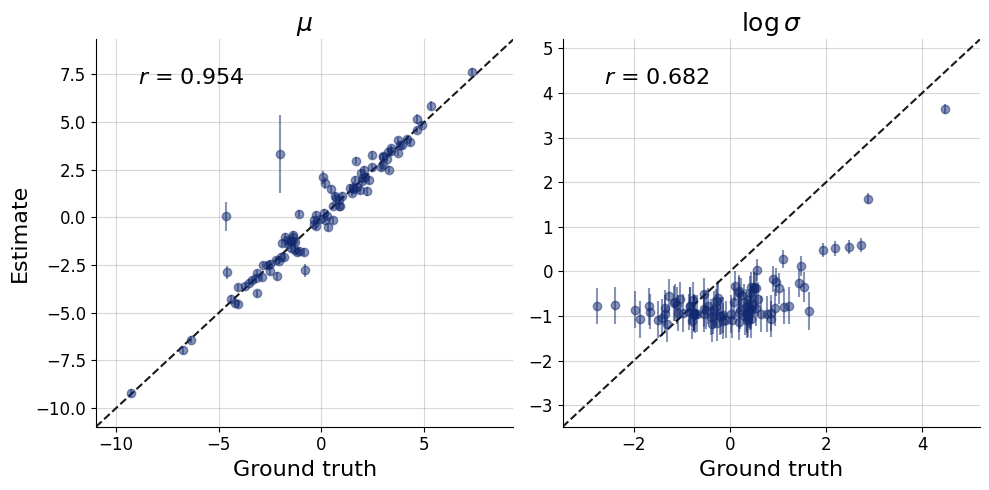

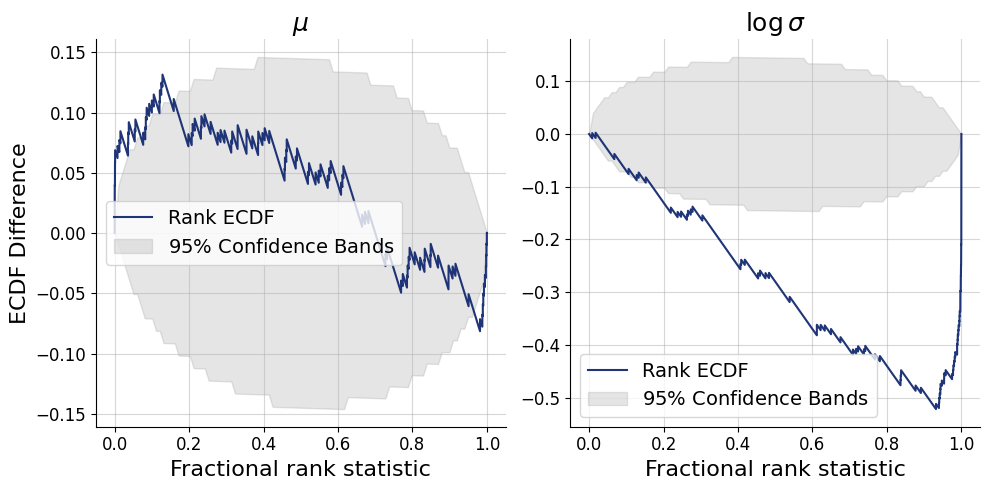

In [7]:
diagnostics.recovery(global_posterior, true_global, variable_names=global_param_names)
diagnostics.calibration_ecdf(global_posterior, true_global, difference=True, variable_names=global_param_names);

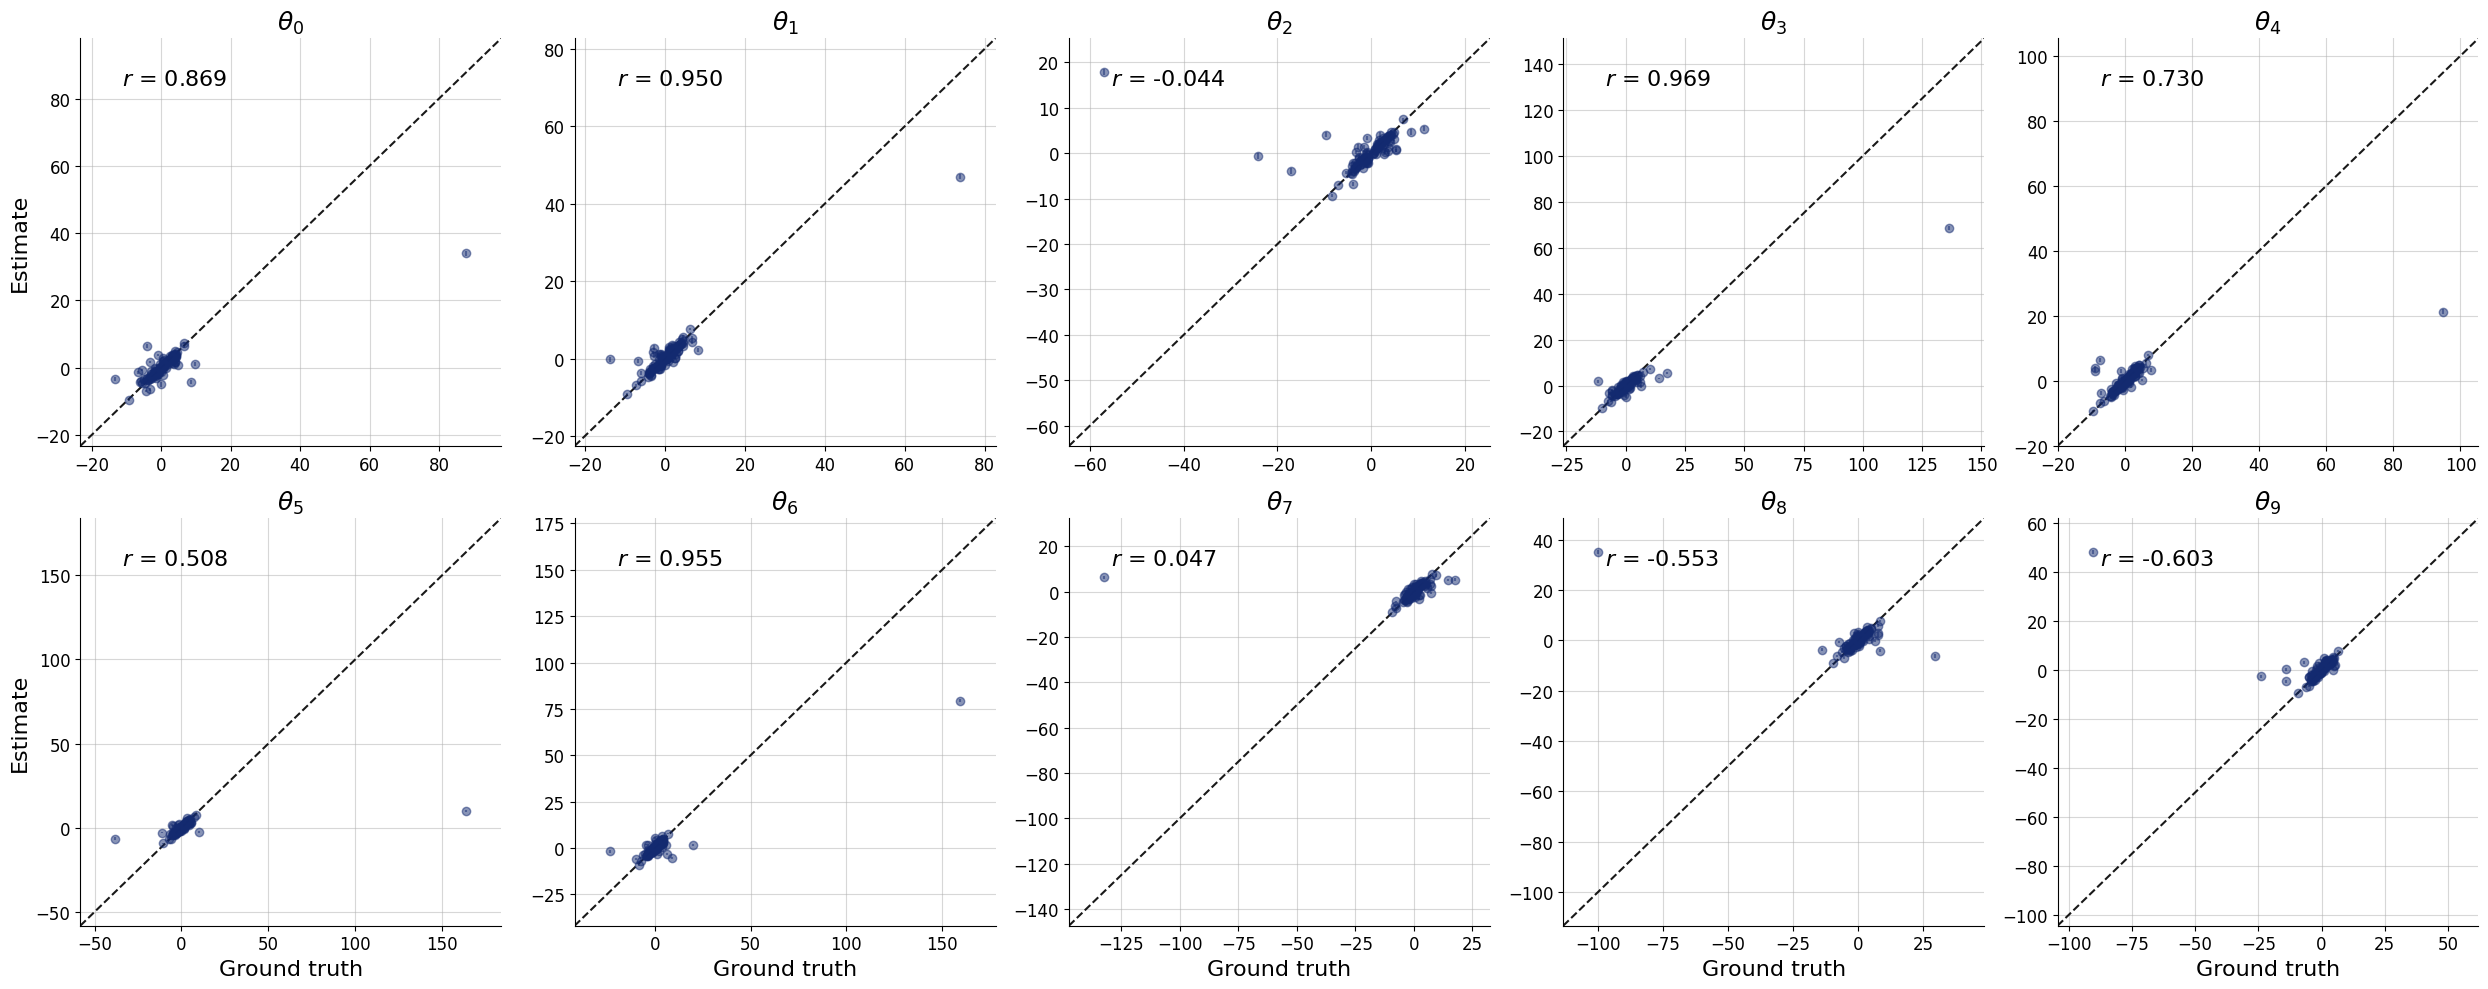

In [8]:
diagnostics.recovery(local_posterior[:, :, :10], true_local[:, :10], variable_names=local_param_names[:10]);

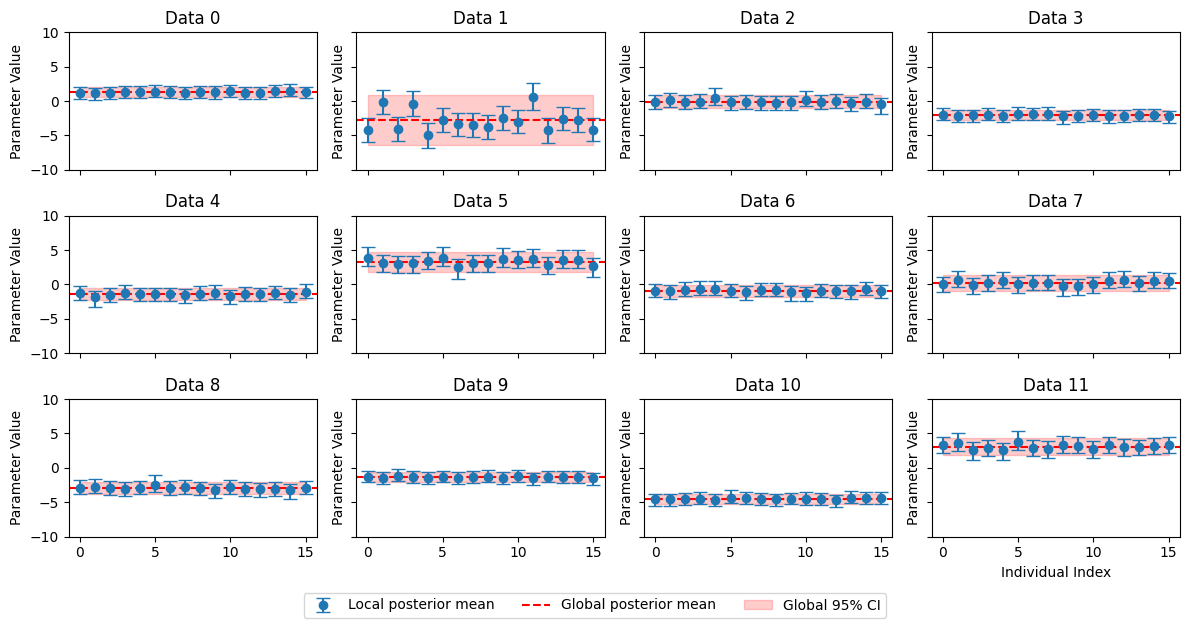

In [14]:
plot_shrinkage(global_posterior[:12], local_posterior[:12, :, :, np.newaxis], min_max=(-10, 10))

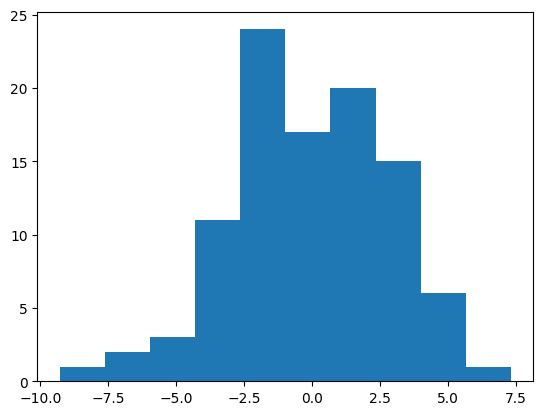

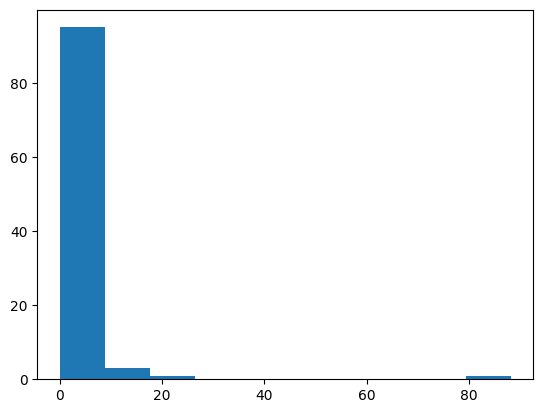

In [15]:
import matplotlib.pyplot as plt
plt.hist(true_global[:, 0])
plt.show()

plt.hist(np.exp(true_global[:, 1]))
plt.show()